# COGS 108 - EDA Checkpoint

# Names

- Joonsung Park
- James Chung
- Richard Gross
- Madison Hambly
- Colin Lintereur

<a id='research_question'></a>
# Research Question

How do the most popular topics from previous COGS 108 final projects vary per quarter from 2019 to 2021? Also what other trends can we find in past submissions, like changes in word count, and number of graphs used?

# Setup

In [106]:
# importing libraries
import numpy as np
import json
import zipfile
import pandas as pd
import re
import paralleldots
import seaborn as sns
import glob
from uclassify import uclassify

# copy/paste API key for ParallelDots
API_KEY = 'eTEGyoSgZ8gx1fNiLHrPC4py02eFt4TtWeuQIU4GgB0'

# copy/paste API key for uclassify
READ_API_KEY = 'pUllRXrepgLH'

uclass = uclassify()
uclass.setReadApiKey(READ_API_KEY)

(To avoid reaching the daily usage limit on the API, we each used our own API keys)

We now search through the zip file of a quarter we want to study. We can get the quarter/group/year information from the file names. However, the research question is difficult to find since the formatting of every submission is not always the same. This may cause the file parser to not find any research question or find the wrong cell. However, this is very rare and does not actually ruin our analysis since all we need is a block of text that describes the topic of the project and any block of text near the research question tends to contain relevant information to the topic of the project. For now, even if the found text is not the research question, we will still process it (later we may exclude these projects, or handle them correctly)

We manually ran this code for each project repo/zip in order to use different API keys. 

In [78]:
# setting API key for classifier
paralleldots.set_api_key(API_KEY)

# initializing lists
research_questions = {}
qtr = []
year = []
group = []
# special projects are marked with '_S' at the end of its name
special = []
word_counts = []
graph_counts = []
table_counts = []
index = 0

# reading zip file for a certain quarter
with zipfile.ZipFile("zips/FinalProjects-SP19-master.zip", "r") as f:
    for i, name in enumerate(f.namelist()):
        # skip files that are not jupyter notebooks
        if '.ipynb' not in name:
            continue
        rf = json.loads(f.read(name))
        word_count = 0
        graph_count = 0
        table_count = 0
        rq_found = False
        
        # loop through every cell
        for j, cell in enumerate(rf['cells']):
            if cell['cell_type'] == 'code':
                if ('outputs' in cell) and (cell['outputs'] != []):# and ('data' in cell['outputs'][0]):# and ('image/png' in cell['outputs'][0]['data'])
                    for k,_ in enumerate(cell['outputs']):
                        if 'data' in cell['outputs'][k]:
                            if 'image/png' in cell['outputs'][k]['data']:
                                graph_count += 1
                            if 'text/html' in cell['outputs'][k]['data']:
                                table_count += 1
            elif cell['cell_type'] == 'markdown':
                for c in cell['source']:
                    # if cell contains the research question header, update lists and extract the research question from the next cell
                    if (rq_found == False) and (re.search(r"(^#.*research question)", c.lower()) != None):
                        #print("RQ FOUND")
                        
                        # extract quarter info from repo name
                        date = re.search(r"-(.*)-", name).group(1)
                        qtr.append(date[:2].upper())
                        year.append(int(date[2:]))

                        # extract group number
                        fname = re.search(r"/.*", name).group(0)
                        group.append(int(re.search(r"[$0-9^]{2,3}", fname)[0]))

                        special.append(False if re.search(r"_S\.ipynb", name) == None else True)
                        # get the research question from the cell AFTER the cell that contains the header 'Research Question'
                        rq = ' '.join(rf['cells'][j+1]['source'])
                        research_questions[str(group[index])+"_"+qtr[index]+"_"+str(year[index])] = rq          
                        rq_found = True
                        index += 1
                    word_count += len(c.replace('#', '').lstrip().split(' '))
        if rq_found:
            word_counts.append(word_count)
            graph_counts.append(graph_count)
            table_counts.append(table_count)

KeyError: "['Unnamed: 0'] not found in axis"

In [35]:
# setting API key for classifier
paralleldots.set_api_key(API_KEY)

# initializing lists
research_questions = {}
qtr = []
year = []
group = []
# special projects are marked with '_S' at the end of its name
special = []
word_counts = []
graph_counts = []
table_counts = []
index = 0

# reading zip file for a certain quarter
with zipfile.ZipFile("zips/FinalProjects-Sp21-main.zip", "r") as f:
    for i, name in enumerate(f.namelist()):
        # skip files that are not jupyter notebooks
        if '.ipynb' not in name:
            continue
        rf = json.loads(f.read(name))
        word_count = 0
        graph_count = 0
        table_count = 0
        rq_found = False
        
        # loop through every cell
        for j, cell in enumerate(rf['cells']):
            if cell['cell_type'] == 'code':
                if ('outputs' in cell) and (cell['outputs'] != []):# and ('data' in cell['outputs'][0]):# and ('image/png' in cell['outputs'][0]['data'])
                    for k,_ in enumerate(cell['outputs']):
                        if 'data' in cell['outputs'][k]:
                            if 'image/png' in cell['outputs'][k]['data']:
                                graph_count += 1
                            if 'text/html' in cell['outputs'][k]['data']:
                                table_count += 1
                        
#                         print(cell['outputs'][0]['data'])
#                         if 'image/png' in cell['outputs']['data']:
#                             print(cell['outputs']['data']['image_png'])

        graph_counts.append(graph_count)
        #print('graphs: ', graph_count)
        table_counts.append(table_count)
        #print('tables: ', table_count)
        

graphs:  20
tables:  20
graphs:  3
tables:  28
graphs:  12
tables:  21
graphs:  10
tables:  38
graphs:  22
tables:  39
graphs:  24
tables:  23
graphs:  34
tables:  8
graphs:  8
tables:  7
graphs:  15
tables:  22
graphs:  6
tables:  1
graphs:  65
tables:  38
graphs:  12
tables:  52
graphs:  11
tables:  9
graphs:  21
tables:  28
graphs:  43
tables:  12
graphs:  15
tables:  9
graphs:  16
tables:  10
graphs:  20
tables:  1
graphs:  18
tables:  4
graphs:  15
tables:  10
graphs:  19
tables:  28
graphs:  7
tables:  28
graphs:  8
tables:  20
graphs:  26
tables:  8
graphs:  28
tables:  12
graphs:  19
tables:  5
graphs:  17
tables:  4
graphs:  3
tables:  1
graphs:  6
tables:  0
graphs:  7
tables:  5
graphs:  4
tables:  3
graphs:  14
tables:  11
graphs:  18
tables:  12
graphs:  5
tables:  16
graphs:  28
tables:  19
graphs:  24
tables:  5
graphs:  8
tables:  1


KeyboardInterrupt: 

After collecting all the data we need from the submissions, we can use a text classifier to find the general topic of the submission. We are currently using an API made by ParallelDots to do this classification for us. See [here](https://apis.paralleldots.com/text_docs/index.html#taxonomy) for details on the API we are using.

In [3]:
# initialize topics list
topic = []

# loop through research questions and find the most confident topic class from topic classifier
for i, (g, q, y) in enumerate(zip(group, qtr, year)):
    response = paralleldots.taxonomy(research_questions[str(group[i])+"_"+qtr[i]+"_"+str(year[i])])
    topic.append(response['taxonomy'][0]['tag'])
    if i == 0:
        print("EXAMPLE:\n", research_questions[str(group[i])+"_"+qtr[i]+"_"+str(year[i])], " :: ", topic[i])

EXAMPLE:
 Can we emulate or improve on the effectivness of Open Comet for comet detection and mean olive moment extraction?  ::  TASTE


Now that we have stored the topics of the submissions, we can run a sanity check to make sure that all of our list are the same length and then export the data to a csv file.

In [33]:
# double check that all the lists are the same length
print(len(group), len(qtr), len(year), len(topic), len(special), len(word_counts), len(graph_counts), len(table_counts))

# generate data frame and output it to a csv file
d = {'Group':group, 'Quarter':qtr, 'Year':year, 'Topic':topic, 'Special':special, 'Word_Count':word_counts, 'Graph_Count':graph_counts, 'Table_Count':table_counts}
df = pd.DataFrame(data = d)
output = df.to_csv(path_or_buf="./csvs/"+qtr[0] + "20" + str(year[0])+".csv", index = False)

NameError: name 'topic' is not defined

# Data Cleaning

Since we are collecting the data ourselves, there is not much work to be done cleaning the data after collecting all of the csv files for each quarter and merging them together into one large dataset. One column we do need to remove however is a column named 'Unnamed: 0'. This column is an artifact of reading csv files that store index information for each dataset. This column is redundant in our new dataset so we can remove it.

In [100]:
# using glob to get all csvs
files = glob.glob('./csvs/*.csv')
df_total = pd.DataFrame()
entries = 0

# read all csvs to dataframes and combine into one df
for f_name in files:
    csv = pd.read_csv(f_name)
    df_total = df_total.append(csv)
    entries = entries + len(csv.index)

assert(len(df_total.index) == entries)
print('Observations: ' + str(len(df_total.index)))
df_total.head()

Observations: 364


,Group,Quarter,Year,Topic,Special,Word_Count,Graph_Count,Table_Count
0,1,FA,21,ARTS & CULTURE,False,7002,15,2
1,2,FA,21,BUSINESS,False,8689,18,16
2,4,FA,21,TECH,False,1864,13,5
3,5,FA,21,EDUCATION,False,5483,32,18
4,6,FA,21,GREEN,False,4595,19,7


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

<AxesSubplot:xlabel='Year', ylabel='Word_Count'>

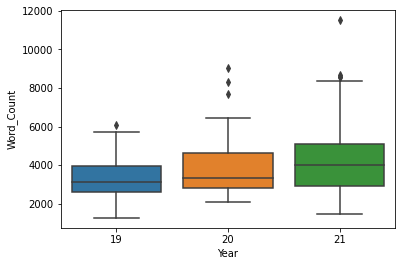

In [103]:
sns.boxplot(y='Word_Count', x='Year', data=df_total)